In [1]:
# General TDA imports
import kmapper as km
from kmapper.jupyter import display
import umap
import sklearn
import sklearn.manifold as manifold
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST, requires tensorflow
from keras.datasets import mnist

# Import datetime for file versioning
import datetime

# For manual clustering and graph construction
from shapely.geometry import MultiPoint, Point
from shapely import concave_hull

# Options
samples_per_digit = 50
total_samples = samples_per_digit * 10

In [2]:
# loading the dataset, had to swap in file manually because of download freeze
(train_x, train_y), (test_x, test_y) = mnist.load_data()

5


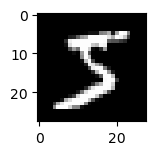

0


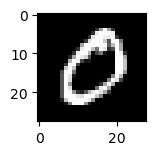

4


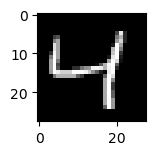

1


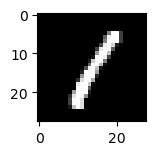

In [3]:
# Demonstrating how the x array contains the numbers, 
# and the y array contains the labels
for i in range(4):
    print(train_y[i])
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [4]:
# Print the types of the arrays we have
print(type(train_x))
print(type(train_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Printing the types of the elements of the arrays we have
print(type(train_x[0]))
print(type(train_y[0]))

<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [6]:
# train_x is a 3D array, where the first index is the position in the numbers, 
# and the next two indices (index 2 and index 3) is the actual grayscale pixel values,
# therefore train_x[0][0][0] should be an uint8
print(type(train_x[0][0][0]))

<class 'numpy.uint8'>


In [7]:
# Two step data selection formatting process:
# 1) Select 10 digits for each number, for a total of 100 digits
# 2) Format each number as a 784-dimension vector instead of a 28 x 28 array

# For #1, create new data and labels numpy arrays
data = np.ndarray(shape=(total_samples, 784))
labels = list()

# Initialize dictionary to keep track of how many of each type 
# of digit we've collected
added = dict()
for i in range (10):
    added[i] = 0

# Select our digits
new_dataset_index = 0
original_dataset_index = 0 # increasing this value selects a different part of the data set
while not all(value == samples_per_digit for value in added.values()):
    digit = train_y[original_dataset_index]
    
    # If we have enough of this number, move on
    if added[digit] >= samples_per_digit:
        original_dataset_index += 1
        continue
    
    # Record the type of number in labels
    labels.append(str(digit) + " (#" + str(added[digit] + 1) + ")")
    
    # Reshape the data and insert it into the data array
    data[new_dataset_index, :] = train_x[original_dataset_index].reshape(-1)

    # Increment indices and added array
    added[digit] += 1
    original_dataset_index += 1
    new_dataset_index += 1

print("Done!")

Done!


In [8]:
# define time-based filename, because scatterplot and mapper outputs will be 
# saved as files, and we want one run of the notebook under one single timestamp
fileID = str(datetime.datetime.now().timestamp())

# Initialize mapper
mapper = km.KeplerMapper(verbose=2)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Next three blocks are 3 different pipelines for projecting data into 2D space

KeplerMapper(verbose=2)


In [ ]:
# PIPELINE 1

# Define the pipeline with PCA and scaling, but without TSNE
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=50)),
])

# Fit and transform the data through the pipeline
intermediate_data = pipeline.fit_transform(data)

# Now apply TSNE separately to the result from the PCA
tsne = TSNE(n_components=2)
projected_data = tsne.fit_transform(intermediate_data)

In [ ]:
# PIPELINE 2

projected_data = mapper.fit_transform(data, projection=[StandardScaler(), PCA(n_components=50), TSNE(n_components=2)])

In [9]:
# PIPELINE 3

projected_data = mapper.fit_transform(data, projection=[MinMaxScaler(), TSNE(n_components=2)])

..Composing projection pipeline of length 2:
	Projections: MinMaxScaler()
		TSNE()
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (500, 784)

..Projecting data using: 
	MinMaxScaler()


..Scaling with: MinMaxScaler()

..Projecting on data shaped (500, 784)

..Projecting data using: 
	TSNE(verbose=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 3.009649
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 61.4616432, gradient norm = 0.0000014 (50 iterations in 0.066s)
[t-SNE] Iteration 100: error = 61.4616432, gradient norm = 0.0000001 (50 iterations in 0.058s)
[t-SNE] Iteration 150: error = 61.4616432, gradient norm = 0.0000000 (50 iterations in 0.067s)
[t-SNE] Iteration 150: gradient norm 0.000000. Finished.
[t-SNE] KL divergen

0 = tab:blue
1 = tab:orange
2 = tab:green
3 = tab:red
4 = tab:purple
5 = tab:brown
6 = tab:pink
7 = tab:gray
8 = gold
9 = tab:cyan


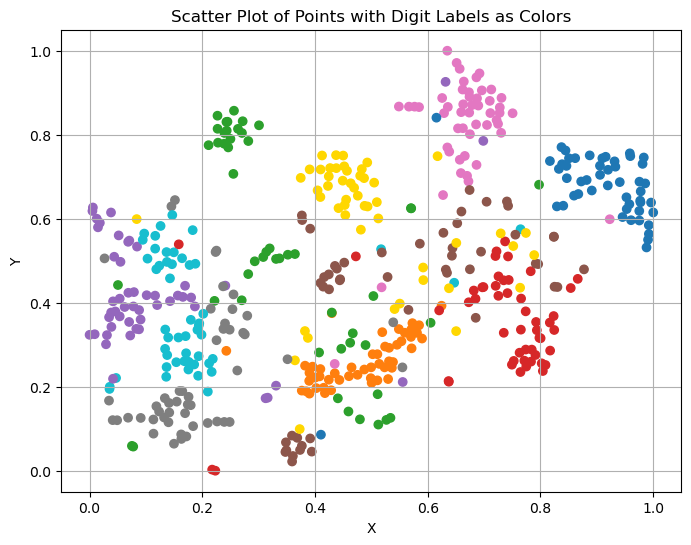

In [10]:
# Show projected data

# Map from digit labels to colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'gold', 'tab:cyan']

# Map each label to a color
mapped_colors = [colors[int(label.split(" ")[0])] for label in labels]

# Print color for each 
for i in range(10):
    print(str(i) + " = " + colors[i])

# Unzipping the list of points into two lists, x and y
x, y = zip(*projected_data)

# Creating the plot with mapped colors
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color=mapped_colors)  # Plot points with colors corresponding to labels

# Setting the title and labels
plt.title('Scatter Plot of Points with Digit Labels as Colors')
plt.xlabel('X')
plt.ylabel('Y')

# Add grid
plt.grid(True)

# Ensure the save directory exists
import os
os.makedirs(fileID)

# Save figure and show
plt.savefig(fileID + "/scatterplot.png")
plt.show()

In [11]:
# Format labels as numpy aray
labels_array = np.array(labels)

# Digit for each data point
digits_for_data_raw = []

for i in range(total_samples):
    digits_for_data_raw.append(int(labels[i].split(" ")[0]))

In [12]:
# Do manual clustering based on digits

# Collect the points from the projected data 
# Which belong to each digit
digit_points = dict()

# Initialize arrays of points
for i in range(10):
    digit_points[i] = []

# Loop through all points and categorize
for index in range(total_samples):
    point = Point(projected_data[index][0], projected_data[index][1])
    digit_points[digits_for_data_raw[index]].append(point)

# Create a convex hull with all the points for a given digit
digit_zones = dict()

# Loop through each digit, construct and store
for digit in range(10):
    digit_zones[digit] = concave_hull(MultiPoint(np.array(digit_points[digit])))

# Create clusters by collecting the indices of 
# all data points within the digit zone
clusters = dict()

# Create adjacency matrix
adjacency_matrix = []

# Fill the matrix with False
for digit in range(10):
    adjacency_matrix.append([False, False, False, False, False, False, False, False, False, False])

# Initialize list for each cluster
for i in range(10):
    clusters[i] = list()

# Assign each point to cluster
for index in range(total_samples):
    # Create point object from projected data point
    point = Point(projected_data[index][0], projected_data[index][1])
    
    # Loop through all digits and see which 
    # this point is a member of
    member_of = list()
    for digit in range(10):
        # See if point is within digit zone
        if digit_zones[digit].covers(point):
            # If so, store index in clusters dict
            clusters[digit].append(index)
            member_of.append(digit)

    # If a point is a member of multiple 
    # clusters, that means that there is an 
    # edge between those two clusters
    if len(member_of) > 1:
        for digit_one in member_of:
            for digit_two in member_of:
                if digit_one is not digit_two:
                    adjacency_matrix[digit_one][digit_two] = True

# Print out cluster sizes
for i in range(10):
    print("Digit " + str(i) + " cluster has " + str(len(clusters[i])) + " points.")

# Create nodes dictionary, where the key is a string and the value is a list of point indices
# Create links dictionary, where the key is a string and the value is a list of cluster keys
# Create simplices array, where its contents are arrays of cluster keys
nodes = dict()
links = dict()
simplices = []

# Utility function for cluster key construction
def clusterKeyForDigit(digit):
    return "cube" + str(digit) + "_cluster0"

# Fill nodes dictionary with data pulled from clusters dictionary
# Fill links dictionary with data interpreted from the adjacency matrix
for digit in range(10):
    # nodes dictionary
    key = clusterKeyForDigit(digit)
    nodes[key] = clusters[digit]

    # links dictionary
    digit_links = list()
    for other_digit in range(digit + 1, 10):
        if adjacency_matrix[digit][other_digit] == True:
            digit_links.append(clusterKeyForDigit(other_digit))

    if (len(digit_links) > 0):
        links[key] = digit_links

    # simplices array
    simplices.append([key])

# more simplices array operations, have to obey format
for digit in range(10):
    key = clusterKeyForDigit(digit)
    if key in links.keys():
        for other_key in links[key]:
            array = [key, other_key]
            simplices.append(array)

# Construct graph dict
manual_graph = dict()
manual_graph['nodes'] = nodes
manual_graph['links'] = links
manual_graph['simplices'] = simplices
manual_graph['meta_data'] = dict()
manual_graph['meta_nodes'] = dict()

Digit 0 cluster has 88 points.
Digit 1 cluster has 52 points.
Digit 2 cluster has 144 points.
Digit 3 cluster has 190 points.
Digit 4 cluster has 194 points.
Digit 5 cluster has 93 points.
Digit 6 cluster has 94 points.
Digit 7 cluster has 72 points.
Digit 8 cluster has 120 points.
Digit 9 cluster has 91 points.


0


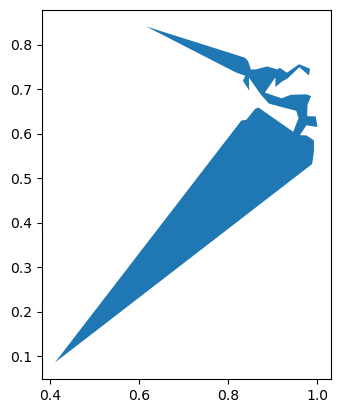

1


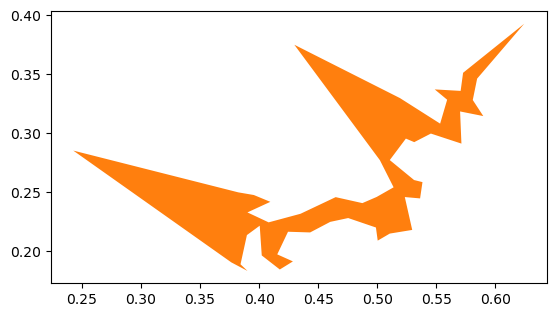

2


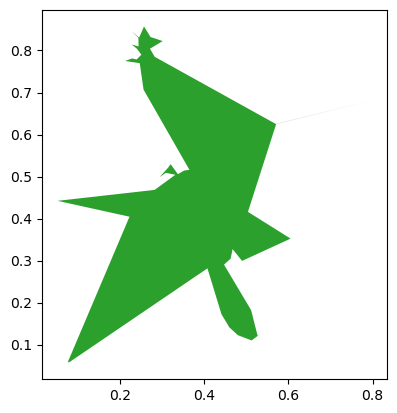

3


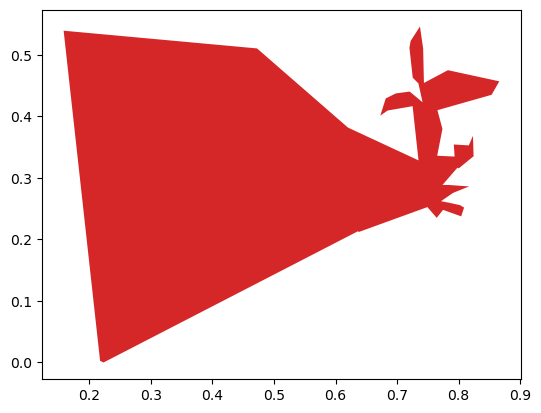

4


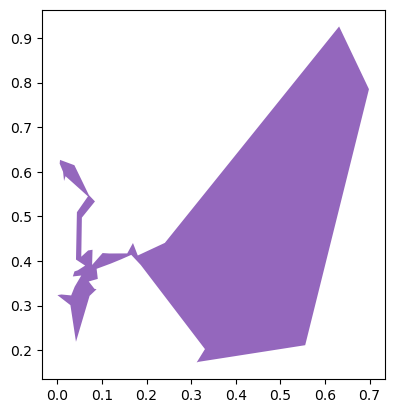

5


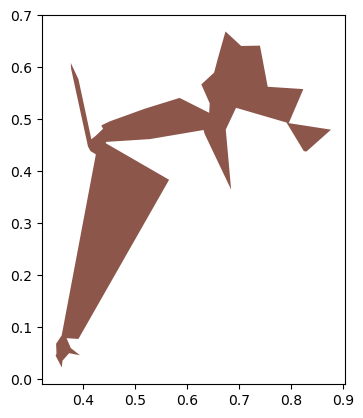

6


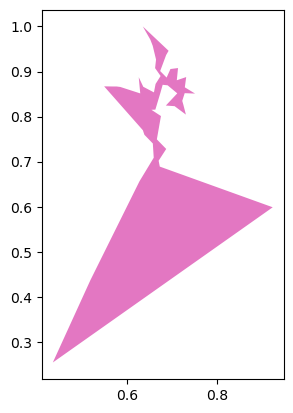

7


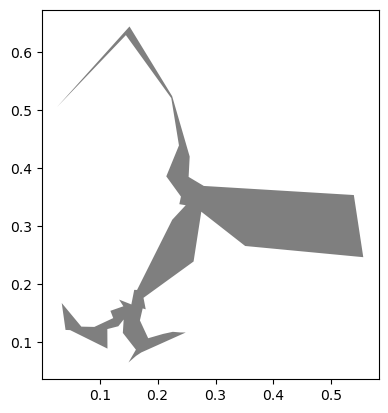

8


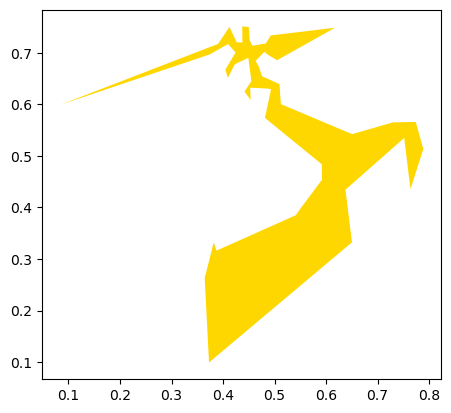

9


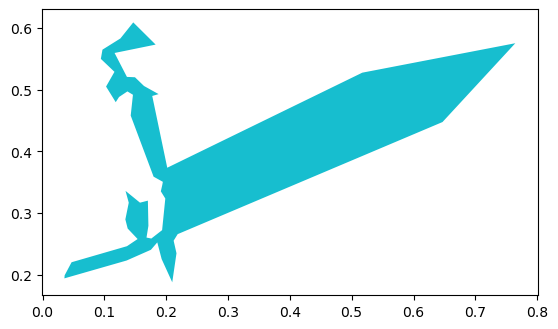

In [13]:
# Visualize manual clusters
import geopandas as gpd

for digit in range(10):
    print(digit)
    gdf = gpd.GeoDataFrame(index=[digit], geometry=[digit_zones[digit]])
    gdf.plot(color=colors[digit])
    plt.show()

In [14]:
# visualize graph
mapper.visualize(
    manual_graph,
    path_html=fileID + "/manual_clustering_output.html",
    title="Manual MNIST Clustering",
    custom_tooltips=labels_array,
    color_values=digits_for_data_raw,
    color_function_name="Digit"
)

km.jupyter.display(fileID + "/manual_clustering_output.html")

Wrote visualization to: 1712298043.390855/manual_clustering_output.html


C:\Users\joshu\anaconda3\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [15]:
# Different graph generation, including cover parameters and cluster algorithms

# Spectral Clustering
# G = mapper.map(projected_data, clusterer=sklearn.cluster.SpectralClustering(n_clusters=1), cover=km.Cover(n_cubes=3, perc_overlap=0.5))

# Decent Mapper
G = mapper.map(projected_data, clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=10), cover=km.Cover(4, 0.2))

Mapping on data shaped (500, 2) using lens shaped (500, 2)

Minimal points in hypercube before clustering: 10
Creating 16 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.

Created 40 edges and 16 nodes in 0:00:00.082147.


In [16]:
# visualize graph
mapper.visualize(G, 
                path_html=fileID + "/automatic_clustering_output.html",
                title="MNIST TDA",
                custom_tooltips = labels_array,
                color_values=digits_for_data_raw,
                color_function_name="Digit"
)

# display mapper in jupyter
km.jupyter.display(fileID + "/automatic_clustering_output.html")

Wrote visualization to: 1712298043.390855/automatic_clustering_output.html


C:\Users\joshu\anaconda3\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
